In [9]:
import pandas as pd
import numpy as np
import pyfixest as pf

In [5]:
df = pd.read_csv('data/cspp_data_2025-11-20.csv')
df.columns
df.head()

,year,st,stateno,state,state_fips,state_icpsr,avgec_low,avgec_mid,avgec_high,avgsoc_low,...,sqli,health_rank,infconsent,w_ec_access,solaw,vaaban,frps,drugs_medical_marijuana,gambling_lottery_adoption,guncontrol_assaultweapon_ban
0,1960,AK,2.0,Alaska,2,81,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1,1961,AK,2.0,Alaska,2,81,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2,1962,AK,2.0,Alaska,2,81,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
3,1963,AK,2.0,Alaska,2,81,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
4,1964,AK,2.0,Alaska,2,81,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN


In [6]:
salaries_df_wide = pd.read_csv('data/teacher_salaries.csv')
salaries_df = pd.melt(salaries_df_wide, id_vars = ['State'], var_name = 'Year', value_name = 'Salary')
salaries_df.rename(columns = {'State': 'state', 'Year': 'year', 'Salary': 'salary'}, inplace = True)

salaries_df['year'] = salaries_df['year'].astype(int)
salaries_df['salary'] = salaries_df['salary'].replace({',': ''}, regex=True).astype(int)

salaries_df.head()

,state,year,salary
0,United States,1990,31367
1,Alabama,1990,24828
2,Alaska,1990,43153
3,Arizona,1990,29402
4,Arkansas,1990,22352


In [7]:
df_filtered = df[['year', 'st', 'state', 'agencyfeesprohibited']]

incl_states = ['Wisconsin', 'Minnesota']

df_filtered = df_filtered[df_filtered['state'].isin(incl_states)]
df_filtered = df_filtered[(df_filtered['year'] >= 2000) & (df_filtered['year'] <= 2018)]
df_filtered

df_merged = pd.merge(df_filtered, salaries_df, on = ['state', 'year'], how = 'left')
df_merged['agencyfeesprohibited'] = df_merged['agencyfeesprohibited'].astype(int)
df_merged["state"] = df_merged["state"].astype("string")
df_merged["st"] = df_merged["st"].astype("string")
df_merged.info()
df_merged

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  38 non-null     int64 
 1   st                    38 non-null     string
 2   state                 38 non-null     string
 3   agencyfeesprohibited  38 non-null     int64 
 4   salary                38 non-null     int64 
dtypes: int64(3), string(2)
memory usage: 1.6 KB


,year,st,state,agencyfeesprohibited,salary
0,2000,MN,Minnesota,0,39802
1,2001,MN,Minnesota,0,42212
2,2002,MN,Minnesota,0,43330
3,2003,MN,Minnesota,0,44745
4,2004,MN,Minnesota,0,45375
5,2005,MN,Minnesota,0,47410
6,2006,MN,Minnesota,0,47522
7,2007,MN,Minnesota,0,49718
8,2008,MN,Minnesota,0,50345
9,2009,MN,Minnesota,0,52414


In [8]:
fit = pf.feols(fml = 'salary ~ agencyfeesprohibited | state + year', 
               data = df_merged, 
               vcov={"CRV1": "state"}
)

fit.summary()

###

Estimation:  OLS
Dep. var.: salary, Fixed effects: state+year
Inference:  CRV1
Observations:  38

| Coefficient          |   Estimate |   Std. Error |               t value |   Pr(>|t|) |     2.5% |    97.5% |
|:---------------------|-----------:|-------------:|----------------------:|-----------:|---------:|---------:|
| agencyfeesprohibited |   -850.659 |        0.000 | -4028641039155344.000 |      0.000 | -850.659 | -850.659 |
---
RMSE: 800.109 R2: 0.978 R2 Within: 0.064 


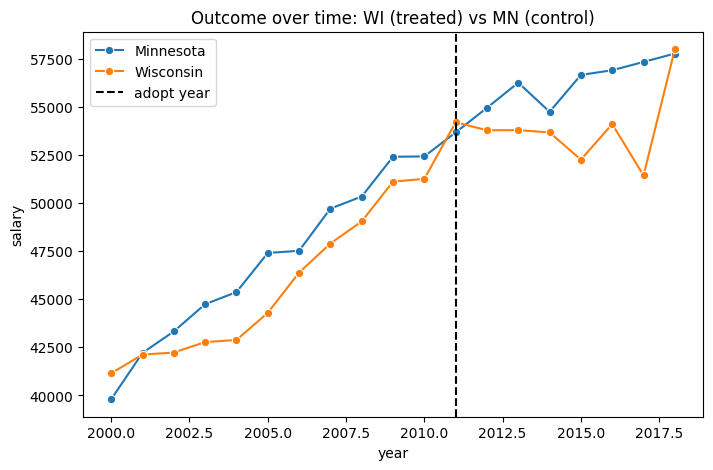

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

agg = df_merged.groupby(["year", "state"])["salary"].mean().reset_index()
plt.figure(figsize=(8,5))
sns.lineplot(data=agg, x="year", y="salary", hue="state", marker="o")
plt.axvline(2011, color="k", linestyle="--", label="adopt year")
plt.legend()
plt.title("Outcome over time: WI (treated) vs MN (control)")
plt.show()
